In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Model parameters 
S1=4 # Stimulus input amplitude to y1
S2=4 # Stimulus input amplitude to y2
b=7 # Mutual inhibitory coupling strength between the y's
k=7 # Rate of decay of the y's
z=1 # Decision threshold
sigma=0.07 # Size of the noise


x0=0  # Starting point of decision variable x
x1=0
dt=0.05  # Time step
t_total=2500
trial_total=1000
t = np.arange(0, t_total, dt)
    
#DDM run
decision_time_c=[]
decision_time_e=[]


#model/trial loop
for tri in range(trial_total): # Trial number
    x_0=np.zeros_like(t)
    x_1=np.zeros_like(t)
    x_0[0]=x0
    x_1[0]=x1
    for p in range(len(x_0)-1): # Time
        
        x_0[p+1] = x_0[p]+dt*(-k*x_0[p]-b*x_1[p]+S1)+ sigma*np.sqrt(dt)*np.random.randn()# Update x_0
        x_1[p+1] = x_1[p]+dt*(-k*x_1[p]-b*x_0[p]+S2)+ sigma*np.sqrt(dt)*np.random.randn()# Update x_1

        if x_0[p]>=z: #or x_0[p]>0:# Condition for making the correct response  
            x_0=x_0[0:p+1]
            x_1=x_1[0:p+1]
            decision_time_c.append(p*dt)
            break # Stop the time "for" loop  
            
        elif x_1[p]>=z: #or x_1[p]>0:# Condition for making the error response   
            x_0=x_0[0:p+1]
            x_1=x_1[0:p+1]
            decision_time_e.append(p*dt)
            break # Stop the time "for" loop

(array([186., 150.,  64.,  44.,  26.,  13.,   3.,   7.,   4.,   1.]),
 array([  23.45,  124.26,  225.07,  325.88,  426.69,  527.5 ,  628.31,
         729.12,  829.93,  930.74, 1031.55]),
 <BarContainer object of 10 artists>)

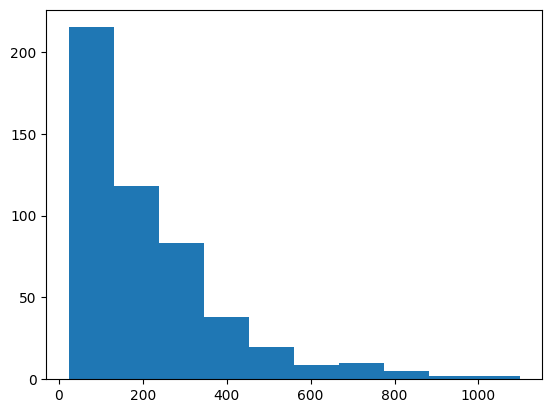

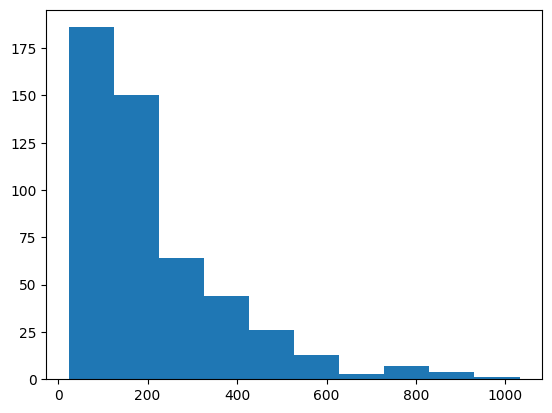

In [14]:
plt.figure()
plt.hist(decision_time_c)
plt.figure()
plt.hist(decision_time_e)

In [12]:
len(x_1[0:len(x_1)])

50000

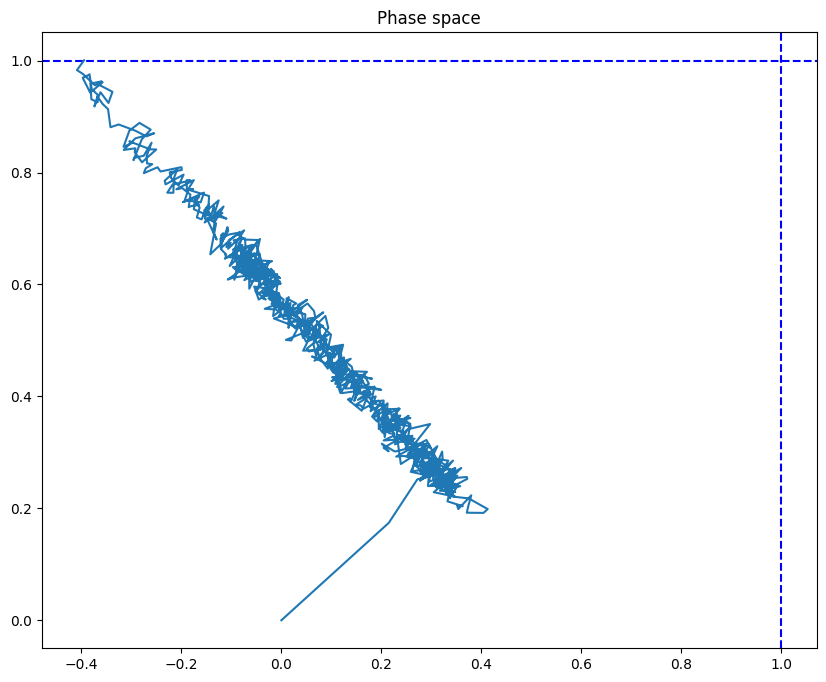

In [24]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.axhline(y=z,linestyle="dashed", color="blue" ,label="decision threshold")
plt.axvline(x=z,linestyle="dashed", color="blue" ,label="decision threshold")
plt.title("Phase space")
plt.plot(x_0,x_1)